# Fly Classiffier: 13 classes

In [2]:
import tensorflow as tf
import os
import scipy as sp
import imghdr
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Read data, get rid of any imaged that are not ['jpeg','jpg', 'bmp', 'png']. 

In [352]:
data_dir = 'data'

In [353]:
#image_exts = ['jpeg','jpg', 'bmp', 'png']
#for image_class in os.listdir(data_dir): 
    #for image in os.listdir(os.path.join(data_dir, image_class)):
        #image_path = os.path.join(data_dir, image_class, image)
        #img = cv2.imread(image_path)
        #tip = imghdr.what(image_path)
        #if tip not in image_exts: 
            #print('Image not in ext list {}'.format(image_path))
            #os.remove(image_path)

In [354]:
data = tf.keras.utils.image_dataset_from_directory( data_dir, labels = 'inferred', image_size = (256,256),label_mode = 'int')

Found 2400 files belonging to 13 classes.


In [355]:
class_names = data.class_names

In [356]:
class_names

['Ants',
 'Chubby Chernobyl ',
 'Humpy',
 'Prince Nymph',
 'Rubber Legs',
 'San Juan worm',
 'Stimulator',
 'Woolly bugger ',
 'elk hair caddis',
 'madam x',
 'parachute Adams',
 'pheasant tail nymph',
 'royal Wulff']

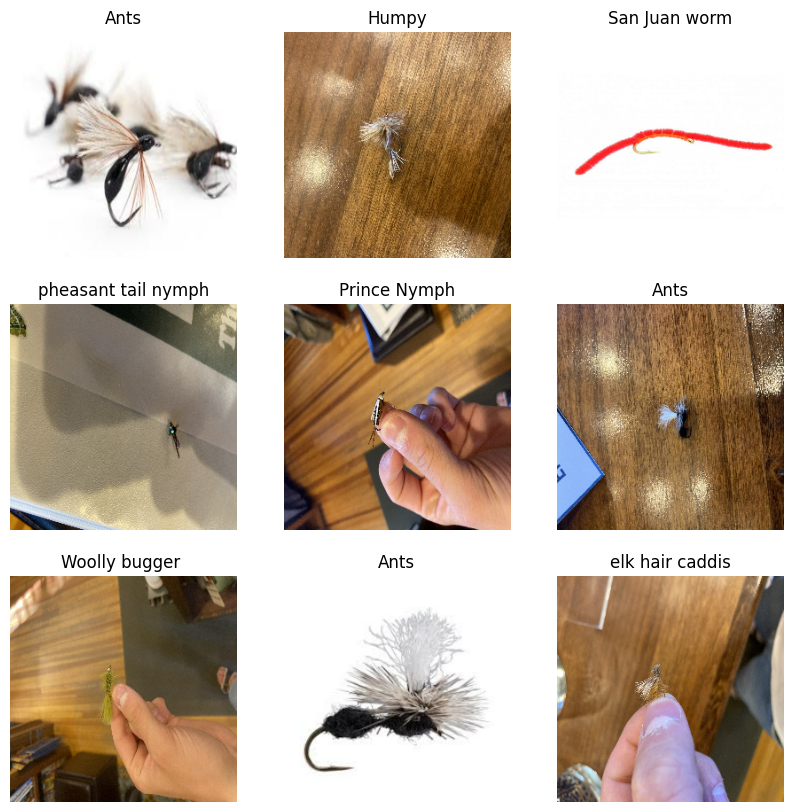

In [357]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    #print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Preprocessing. Scale data to between 0 and 1, split batches into train and test.

In [358]:
#Scaling
data = data.map(lambda x,y: (x/255.0 , y))

In [359]:
train_size =int(len(data)*.9)
val_size = int(len(data)*.05) +1 
test_size = int(len(data)*.05) +1
a
print(train_size + val_size + test_size)
print(len(data))
train_size, val_size, test_size

75
75


(67, 4, 4)

In [360]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Create a convolutional neural network

In [361]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [362]:
#model = Sequential()

In [363]:
# Variables
INPUT_SHAPE = (256,256, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [364]:
model.compile('adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [365]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 246016)            0         
                                                                 
 dense_14 (Dense)            (None, 128)             

### Train the network

In [368]:
model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 2/67 [..............................] - ETA: 1:42 - loss: 17.2717 - accuracy: 0.1094

2023-09-21 15:30:44.975475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 3.6690 - accuracy: 0.1973

2023-09-21 15:32:32.418027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 153s 2s/step - loss: 3.6690 - accuracy: 0.1973 - val_loss: 2.1266 - val_accuracy: 0.4062
Epoch 2/20
 2/67 [..............................] - ETA: 1:43 - loss: 2.1529 - accuracy: 0.3594

2023-09-21 15:33:17.933779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 1.6209 - accuracy: 0.5205

2023-09-21 15:35:05.331263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 153s 2s/step - loss: 1.6209 - accuracy: 0.5205 - val_loss: 1.3334 - val_accuracy: 0.6562
Epoch 3/20
 2/67 [..............................] - ETA: 1:48 - loss: 1.3223 - accuracy: 0.6250

2023-09-21 15:35:50.538512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.7526 - accuracy: 0.8064

2023-09-21 15:37:33.995413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 147s 2s/step - loss: 0.7526 - accuracy: 0.8064 - val_loss: 0.8308 - val_accuracy: 0.7656
Epoch 4/20
 2/67 [..............................] - ETA: 1:41 - loss: 0.3790 - accuracy: 0.8906

2023-09-21 15:38:17.039251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.9408

2023-09-21 15:40:04.974230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 151s 2s/step - loss: 0.2622 - accuracy: 0.9408 - val_loss: 0.6335 - val_accuracy: 0.8594
Epoch 5/20
 2/67 [..............................] - ETA: 1:36 - loss: 0.0924 - accuracy: 0.9688

2023-09-21 15:40:48.292667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9669

2023-09-21 15:42:33.858493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 151s 2s/step - loss: 0.1511 - accuracy: 0.9669 - val_loss: 0.5973 - val_accuracy: 0.8594
Epoch 6/20
 2/67 [..............................] - ETA: 2:21 - loss: 0.2043 - accuracy: 0.9531

2023-09-21 15:43:21.743697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9790

2023-09-21 15:45:37.114430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 189s 3s/step - loss: 0.1191 - accuracy: 0.9790 - val_loss: 0.3282 - val_accuracy: 0.9375
Epoch 7/20
 1/67 [..............................] - ETA: 8:21 - loss: 0.0281 - accuracy: 1.0000

2023-09-21 15:46:30.697400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9883

2023-09-21 15:48:43.186511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 186s 3s/step - loss: 0.0639 - accuracy: 0.9883 - val_loss: 0.2037 - val_accuracy: 0.9375
Epoch 8/20
 2/67 [..............................] - ETA: 2:19 - loss: 0.0767 - accuracy: 0.9844

2023-09-21 15:49:37.047015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9949

2023-09-21 15:51:55.852933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 193s 3s/step - loss: 0.0362 - accuracy: 0.9949 - val_loss: 0.2218 - val_accuracy: 0.9531
Epoch 9/20
 2/67 [..............................] - ETA: 2:41 - loss: 0.4491 - accuracy: 0.9531 

2023-09-21 15:52:52.207442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9921

2023-09-21 15:55:10.993335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 196s 3s/step - loss: 0.0610 - accuracy: 0.9921 - val_loss: 0.3148 - val_accuracy: 0.9531
Epoch 10/20
 1/67 [..............................] - ETA: 8:49 - loss: 0.0026 - accuracy: 1.0000

2023-09-21 15:56:05.199744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9963

2023-09-21 15:58:11.228439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 171s 2s/step - loss: 0.0208 - accuracy: 0.9963 - val_loss: 0.4572 - val_accuracy: 0.9453
Epoch 11/20
 2/67 [..............................] - ETA: 1:41 - loss: 0.0130 - accuracy: 1.0000

2023-09-21 15:58:53.898860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9977

2023-09-21 16:00:37.522366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 147s 2s/step - loss: 0.0265 - accuracy: 0.9977 - val_loss: 0.2550 - val_accuracy: 0.9609
Epoch 12/20
 2/67 [..............................] - ETA: 1:44 - loss: 0.0079 - accuracy: 1.0000

2023-09-21 16:01:20.467003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9930

2023-09-21 16:03:03.890569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 146s 2s/step - loss: 0.0351 - accuracy: 0.9930 - val_loss: 0.2370 - val_accuracy: 0.9453
Epoch 13/20
 2/67 [..............................] - ETA: 1:41 - loss: 0.1236 - accuracy: 0.9844

2023-09-21 16:03:46.728188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9958

2023-09-21 16:05:27.681138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 144s 2s/step - loss: 0.0212 - accuracy: 0.9958 - val_loss: 0.1606 - val_accuracy: 0.9609
Epoch 14/20
 2/67 [..............................] - ETA: 1:50 - loss: 0.1598 - accuracy: 0.9844

2023-09-21 16:06:10.513785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9963

2023-09-21 16:07:55.699024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 147s 2s/step - loss: 0.0260 - accuracy: 0.9963 - val_loss: 0.0827 - val_accuracy: 0.9922
Epoch 15/20
 2/67 [..............................] - ETA: 1:35 - loss: 0.0064 - accuracy: 1.0000

2023-09-21 16:08:37.012101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9977

2023-09-21 16:10:22.070679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 147s 2s/step - loss: 0.0232 - accuracy: 0.9977 - val_loss: 0.0959 - val_accuracy: 0.9688
Epoch 16/20
 2/67 [..............................] - ETA: 1:35 - loss: 0.0013 - accuracy: 1.0000

2023-09-21 16:11:04.009831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9991

2023-09-21 16:12:40.104758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 139s 2s/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.1968 - val_accuracy: 0.9453
Epoch 17/20
 2/67 [..............................] - ETA: 1:43 - loss: 2.6322e-04 - accuracy: 1.0000

2023-09-21 16:13:23.954149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9977

2023-09-21 16:15:09.312884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 148s 2s/step - loss: 0.0128 - accuracy: 0.9977 - val_loss: 0.1429 - val_accuracy: 0.9766
Epoch 18/20
 2/67 [..............................] - ETA: 1:42 - loss: 0.0031 - accuracy: 1.0000

2023-09-21 16:15:51.916976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991

2023-09-21 16:17:38.107063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 151s 2s/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1044 - val_accuracy: 0.9766
Epoch 19/20
 2/67 [..............................] - ETA: 1:38 - loss: 0.0019 - accuracy: 1.0000

2023-09-21 16:18:22.716872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9991

2023-09-21 16:20:09.900324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 152s 2s/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0910 - val_accuracy: 0.9844
Epoch 20/20
 2/67 [..............................] - ETA: 1:45 - loss: 0.0015 - accuracy: 1.0000    

2023-09-21 16:20:55.896976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9986

2023-09-21 16:22:40.402044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


67/67 [==============================] - 148s 2s/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 0.1879 - val_accuracy: 0.9688


In [ ]:
model.save('model13classes.h5') 

### Evaluate

2023-09-21 16:39:50.691150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


Pred: pheasant tail nymph  ..... Actual:  pheasant tail nymph
Pred: Chubby Chernobyl   ..... Actual:  Chubby Chernobyl 
Pred: Rubber Legs  ..... Actual:  Rubber Legs
Pred: San Juan worm  ..... Actual:  San Juan worm
Pred: parachute Adams  ..... Actual:  parachute Adams
Pred: pheasant tail nymph  ..... Actual:  pheasant tail nymph
Pred: Woolly bugger   ..... Actual:  Woolly bugger 
Pred: pheasant tail nymph  ..... Actual:  pheasant tail nymph
Pred: Rubber Legs  ..... Actual:  Rubber Legs


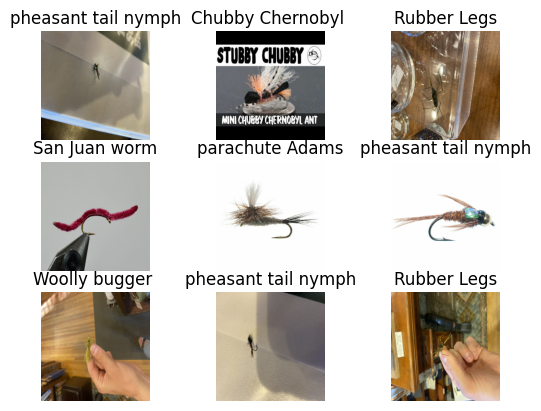

In [379]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    for i in range(9):
        print("Pred: " + class_names[np.argmax(model.predict(np.expand_dims(X[i], 0), verbose = 0))], ' ..... Actual: ', class_names[y[i]])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X[i])   
        plt.title(class_names[y[i]])
        plt.axis("off")      
    break

In [376]:
accuracy = []
loss = []
for batch in test.as_numpy_iterator(): 
    X, y = batch
    loss.append(model.evaluate(X,y, verbose = 0)[0])
    accuracy.append(model.evaluate(X,y, verbose = 0)[1])
    
print("Test accuracy: " , np.mean(accuracy) , "\nTest Loss: " , np.mean(loss))   

2023-09-21 16:35:44.475763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


Test accuracy:  0.9921875 
Test Loss:  0.061201054239063524
